Ответы на вопросы:
Q1. Какой рекламный канал принёс больше всего дохода за всё время?
A1. Yandex

Q2. Как изменился средний чек транзакции после введения коронавирусных ограничений?
Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)
A2. Анализ показал значительное снижение суммы чека в марте-апреле, а затем чуть более медленное восстановление прежних показателей.
 До введения ограничений медианные суммы чеков с применением промокода и без него были примерно одинаковы, а на этапе восстановительного роста чека видно, что суммы чеков с промокодами становятся выше, чем без них. Кроме того, к концу срока наблюдений медианная сумма чека с применением промокода восстановилась до "допандемийных значений", а без применения - нет.

Q3. Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?
A3. Да, можно.

Q4. Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед.
A4. Прогноз дохода от контекстной рекламы через полгода составляет 1 150 180 р.

**Далее представлен код для проведенного анализа и мои комментарии к нему.**

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [101]:
df = pd.read_csv('summer_camp_data-1.csv', encoding="utf-8")
df.head(10)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0
5,2020-05-11,yandex,cpc,Не определено,Десктоп,no,no,2775,1441,5990,1196,549,76,90862.0
6,2020-05-11,yandex,organic,Не определено,Мобайл,no,no,3116,1395,4950,990,703,112,111012.0
7,2020-05-11,yandex,cpc,Не определено,Мобайл,no,no,3854,1842,7310,1462,913,150,168397.0
8,2020-05-11,yandex,cpc,Не определено,Десктоп,yes,no,2816,510,8450,1688,949,170,187452.0
9,2020-05-11,(direct),(none),Не определено,Десктоп,yes,no,1184,324,2710,542,269,54,67849.0


Проверить, что в исходных данных нет пустых ячеек

In [214]:
df.isna().sum()

date                      0
source                    0
medium                    0
delivery_available        0
device_type               0
promo_activated           0
filter_used               0
pageviews                 0
visits                    0
productClick              0
addToCart                 0
checkout                  0
transactions              0
revenue                   0
average_check         14271
CR                        0
dtype: int64

Для более удобной работы со временем переведем столбец date в тип datetime (исходный тип - object)

In [102]:
df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
df.dtypes

date                  datetime64[ns]
source                        object
medium                        object
delivery_available            object
device_type                   object
promo_activated               object
filter_used                   object
pageviews                      int64
visits                         int64
productClick                   int64
addToCart                      int64
checkout                       int64
transactions                   int64
revenue                      float64
dtype: object

Q1: Какой рекламный канал принёс больше всего дохода за всё время?
A1: yandex

In [31]:
df.groupby('source').aggregate({'revenue': 'sum'}).sort_values('revenue', ascending=False)

,revenue
source,
yandex,4.674748e+08
google,4.565170e+08
(direct),2.384474e+08
admitad,6.573886e+07
eLama,1.643239e+07
cityads,1.429077e+07
promo,5.363685e+06
co-promo,3.347826e+06
newsletter,2.225289e+06


Q2: Как изменился средний чек транзакции после введения коронавирусных ограничений?
Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)


Шаг 1. Для каждой строки таблицы рассчитаем сумму среднего чека и добавим в новый столбец 'average_check'

In [105]:
df['average_check'] = df.revenue / df.transactions
df

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,average_check
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,962.766667
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,1126.626728
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,1051.500000
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,1112.718310
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,997.758065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52719,2020-06-21,(direct),(none),Доставка есть,Мобайл,yes,yes,65,4,250,50,58,4,4821.0,1205.250000
52720,2020-08-09,co-promo,email,Доставка есть,Мобайл,no,no,43,2,250,50,23,1,7348.0,7348.000000
52721,2020-09-22,google,cpc,Доставка есть,Мобайл,yes,yes,153,3,250,50,58,1,958.0,958.000000
52722,2020-08-25,(direct),(none),Не определено,Мобайл,yes,yes,219,8,250,50,45,1,828.0,828.000000


Шаг 2. Создадим таблицу с расчетом среднего чека с группировкой по дате транзакции

In [106]:
avg_check = df.groupby('date', as_index=False).aggregate({'average_check':'mean'})
avg_check.head()

,date,average_check
0,2020-01-01,1125.093281
1,2020-01-02,1151.822613
2,2020-01-03,1225.627378
3,2020-01-04,1199.836755
4,2020-01-05,1216.646850


Text(0.5, 1.0, 'Рисунок 1')

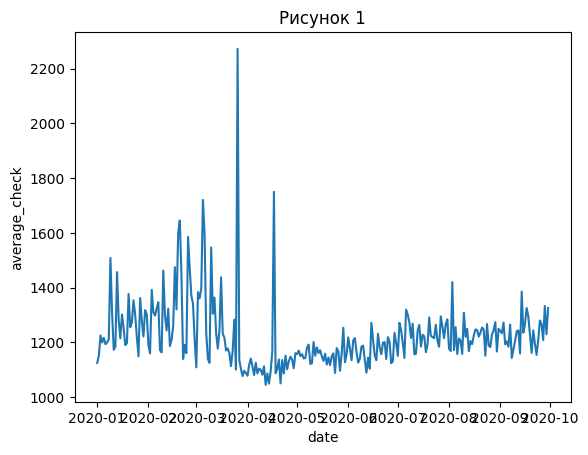

In [120]:
sns.lineplot(x=avg_check.date, y=avg_check.average_check).set_title('Рисунок 1')


На Рисунке 1 видны сильные выбросы, поэтому вероятно, корректнее будет работать с медианным значением чека, а не средним.

In [107]:
avg_check1 = df.groupby('date', as_index=False).aggregate({'average_check':'median'})
avg_check1.head()

,date,average_check
0,2020-01-01,1116.988636
1,2020-01-02,1149.750000
2,2020-01-03,1182.742424
3,2020-01-04,1148.295833
4,2020-01-05,1168.013699


Шаг 2. Построим график динамики изменения размера среднего чека

Text(0.5, 1.0, 'Рисунок 2')

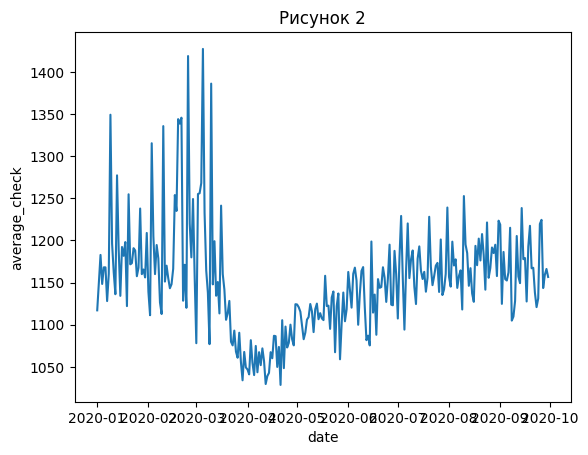

In [121]:
sns.lineplot(x=avg_check1.date, y=avg_check1.average_check).set_title('Рисунок 2')

Общая динамика на Рисунке 2 показывает, что во втором квартале медианная сумма значительно снизилась по сравнению с началом года. После этого наблюдается рост суммы, которая к концу срока наблюдений практически выходит на прежний уровень.
На графике видны сильные разбросы значений даже в пределах одного месяца, поэтому можно попробовать для упрощения восприятия графика сделать группировку данных по месяцам и посмотреть его медианное (Рисунок 3). Так еще точнее видно сильное снижение суммы чека в марте-апреле, а затем чуть более медленное восстановление прежних показателей.

Text(0.5, 1.0, 'Рисунок 3')

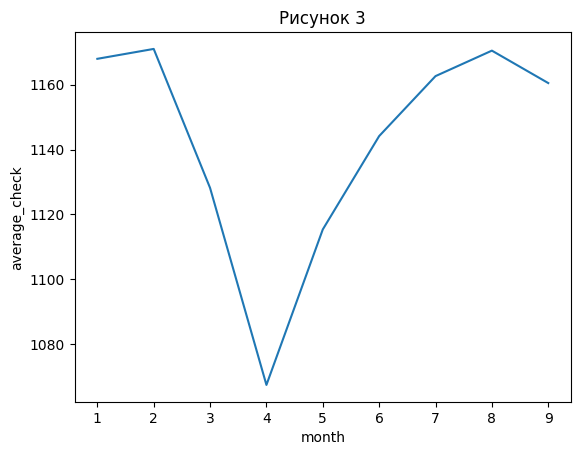

In [122]:
avg_check1['month'] = pd.DatetimeIndex(avg_check1['date']).month
avg_check_month = avg_check1.groupby('month', as_index=False).aggregate({'average_check': 'median'})
sns.lineplot(x=avg_check_month.month, y=avg_check_month.average_check).set_title('Рисунок 3')

Теперь для анализа чеков с активацией промокода и без, создадим таблицу с группировкой по дате и применению промокода, значение чека вновь возьмем медианное:

In [114]:
avg_check_promo = df.groupby(['date', 'promo_activated'], as_index=False).aggregate({'average_check':'median'})
avg_check_promo.head()

,date,promo_activated,average_check
0,2020-01-01,no,1056.019006
1,2020-01-01,yes,1148.095588
2,2020-01-02,no,1099.362745
3,2020-01-02,yes,1194.868132
4,2020-01-03,no,1094.333333


Построим график

Text(0.5, 1.0, 'Рисунок 4')

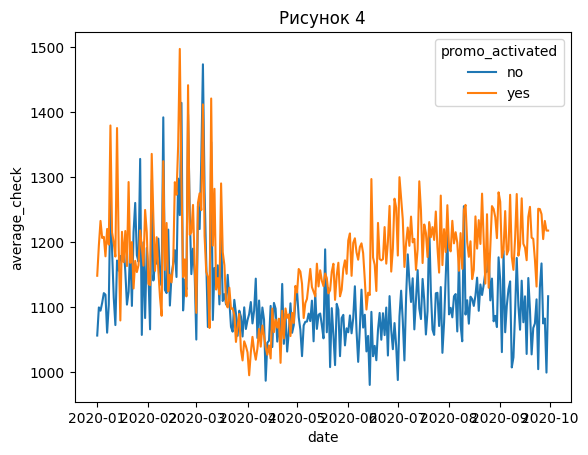

In [123]:
sns.lineplot(x=avg_check_promo.date, y=avg_check_promo.average_check, hue=avg_check_promo.promo_activated).set_title('Рисунок 4')

На графике (Рисунок 4), построенном по дням опять видны разбросы даже внутри месяца, однако уже видна тенденция к тому что до ограничений медианные суммы чеков с применением промокода и без него были примерно одинаковы, а на этапе восстановительного роста чека видно, что суммы чеков с промокодами становятся выше, чем без них.
При построении графика с группировкой по месяцам (Рисунок 5) эта тенденция отчетливо видна, начиная с мая. Кроме того, график показывает, что к концу срока наблюдений медианная сумма чека с применением промокода восстановилась до "допандемийных значений", а без применения - нет.

Text(0.5, 1.0, 'Рисунок 5')

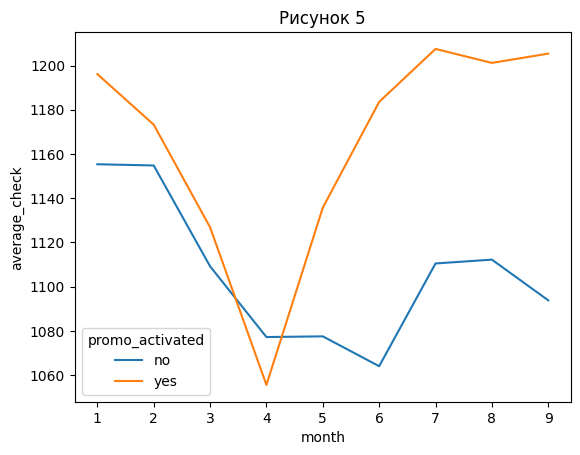

In [124]:
avg_check_promo['month'] = pd.DatetimeIndex(avg_check_promo['date']).month
avg_check_promo_month = avg_check_promo.groupby(['month', 'promo_activated'], as_index=False).aggregate({'average_check': 'median'})
sns.lineplot(x=avg_check_promo_month.month, y=avg_check_promo_month.average_check, hue=avg_check_promo_month.promo_activated).set_title('Рисунок 5')

Меня заинтересовало, с чем могут быть связаны разбросы внутри месяца. Мое предположение состоит в разнице продаж в будние и выходные дни. Для этого на основе даты создадим в таблице 'avg_check' столбец ''Day

In [125]:
avg_check['month'] = pd.DatetimeIndex(avg_check['date']).month
avg_check['week_day'] = avg_check['date'].apply(
    lambda x: x.strftime('%a'))
avg_check.head()

,date,average_check,week_day,month
0,2020-01-01,1125.093281,Wed,1
1,2020-01-02,1151.822613,Thu,1
2,2020-01-03,1225.627378,Fri,1
3,2020-01-04,1199.836755,Sat,1
4,2020-01-05,1216.646850,Sun,1


In [128]:
avg_check_days = avg_check.groupby(['month', 'week_day'], as_index=False).aggregate({'average_check': 'mean'})
avg_check_days

,month,week_day,average_check
0,1,Fri,1277.762422
1,1,Mon,1347.265191
2,1,Sat,1195.340664
3,1,Sun,1186.694714
4,1,Thu,1326.929967
...,...,...,...
58,9,Sat,1235.835857
59,9,Sun,1178.512901
60,9,Thu,1252.659902
61,9,Tue,1209.315621


Действительно, на рисунке 6 видно, что средний чек в субботу и воскресенье ниже такового в будние дни, однако после введения ограничений эта разница выражена меньше, чем в первый квартал года.

Text(0.5, 1.0, 'Рисунок 6')

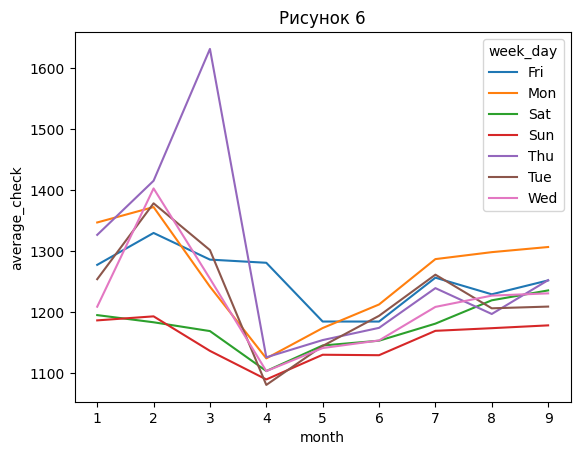

In [129]:
sns.lineplot(x=avg_check_days.month, y=avg_check_days.average_check, hue=avg_check_days.week_day).set_title('Рисунок 6')

Q3: Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

Добавим в таблицу с исходными данными столбец 'CR', поделив количество транзакций на количество посещений

In [158]:
df['CR'] = df.transactions / df.visits
df.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,average_check,CR
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,962.766667,0.072993
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,1126.626728,0.398897
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,1051.500000,0.068966
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,1112.718310,0.083138
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,997.758065,0.062000


Создадим отдельную таблицу для CR, с группировкой по дате и указанием дня недели

In [165]:
df_cr = df.groupby(['date'], as_index=False).aggregate({'CR':'mean'})
df_cr['week_day'] = df_cr['date'].apply(
    lambda x: x.strftime('%a'))
df_cr.head()

,date,CR,week_day
0,2020-01-01,0.364479,Wed
1,2020-01-02,0.420501,Thu
2,2020-01-03,0.425350,Fri
3,2020-01-04,0.417684,Sat
4,2020-01-05,0.399347,Sun


Создадим два запроса для выборки CR за будние дни и за выходные.
Проверим гомогенность дисперсии для двух выборок - они примерно одинаковы (0,0019)

In [184]:
query_weekend = (df_cr.week_day == 'Sat') | (df_cr.week_day == 'Sun')
query_working_day = (df_cr.week_day != 'Sat') & (df_cr.week_day != 'Sun')
df_cr.loc[query_weekend]['CR'].var()
df_cr.loc[query_working_day]['CR'].var()

0.0019527633248965592

Проверим нормальность распределения выборок

Text(0.5, 1.0, 'Рисунок 7')

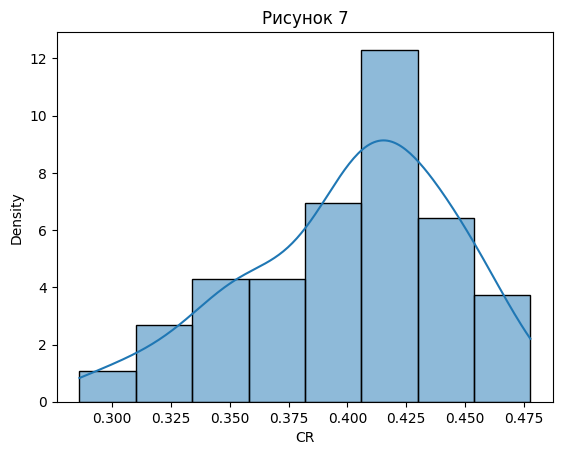

In [195]:
sns.histplot(df_cr.loc[query_weekend]['CR'], kde=True,stat="density").set_title('Рисунок 7')

По гистограмме распределения плотности значений на Рисунке 7 сложно дать однозначный ответ о нормальности распределения выборки выходного дня. Поэтому проводим дополнительный статистический тест, который говорит о том, что нужно принять нулевую гипотезу о нормальности распределения.

In [193]:
import scipy.stats as stats
stats.normaltest(df_cr.loc[query_weekend].CR)

NormaltestResult(statistic=4.371483154084859, pvalue=0.11239435366938949)

Проделаем то же самое для выборки будних дней.

Text(0.5, 1.0, 'Рисунок 8')

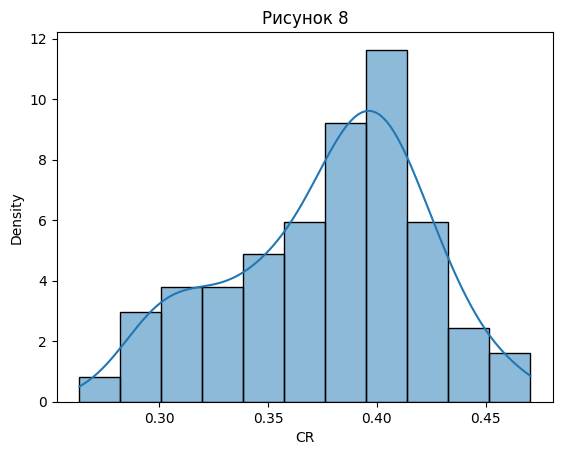

In [197]:
sns.histplot(df_cr.loc[query_working_day]['CR'], kde=True,stat="density").set_title('Рисунок 8')

На Рисунке 8 видно, что отклонения от нормального распределения в данной выборке сильнее, у него нет выраженной унимодальности. Проводим статистический тест, который показывает, что действительно, данное распределение отлично от нормального.

In [198]:
stats.normaltest(df_cr.loc[query_working_day].CR)

NormaltestResult(statistic=8.576650334519627, pvalue=0.013727897987291404)

Нулевая гипотеза: Средние двух выборок равны
Так как распределение одной из выборок отличается от нормального, сравнение проведем с использованием непараметрического критерия Манна-Утини. По его результатам  p-value < 0.05, то есть мы отклоняем нулевую гипотезу и с вероятностью практически 100% можем сказать, что CR в выходные дни отличается от CR в будние дни.

In [199]:
stats.mannwhitneyu(df_cr.loc[query_working_day].CR, df_cr.loc[query_weekend].CR)

MannwhitneyuResult(statistic=5268.0, pvalue=5.987022850666307e-05)

Q4: Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед.

Для этого сделаем выборку из исходного датасета для доходов от контекстной рекламы с группировкой по датам

In [200]:
query_cpc = (df.medium == 'cpc')
cpc_medium = df.loc[query_cpc].groupby(['date'], as_index=False).aggregate({'revenue':'sum'})
cpc_medium.head()

,date,revenue
0,2020-01-01,1278862.0
1,2020-01-02,1774136.0
2,2020-01-03,1889112.0
3,2020-01-04,2072428.0
4,2020-01-05,2061834.0


In [205]:
cpc_medium['week_number'] = cpc_medium['date'].dt.isocalendar().week.astype("int64")
cpc_medium.groupby(['week_number'], as_index=False).aggregate({'revenue':'median'})
cpc_medium.dtypes

date           datetime64[ns]
revenue               float64
week_number             int64
dtype: object

Text(0.5, 1.0, 'Рисунок 9')

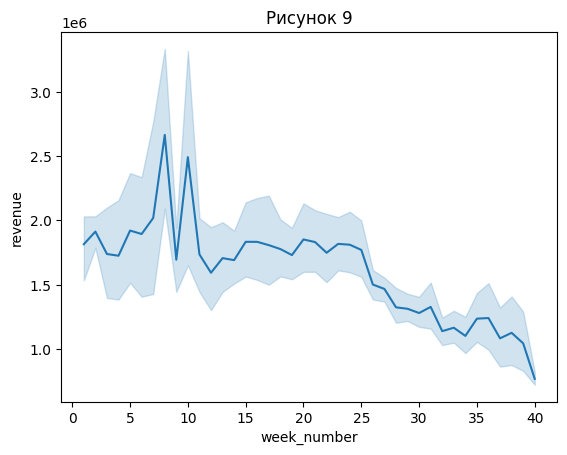

In [206]:
sns.lineplot(x=cpc_medium.week_number, y=cpc_medium.revenue).set_title('Рисунок 9')

Для прогнозирования необходимо построить модель регрессии. На рисунках 9 и 10 видно, что зависимость переменных нелинейна.

Text(0.5, 1.0, 'Рисунок 10')

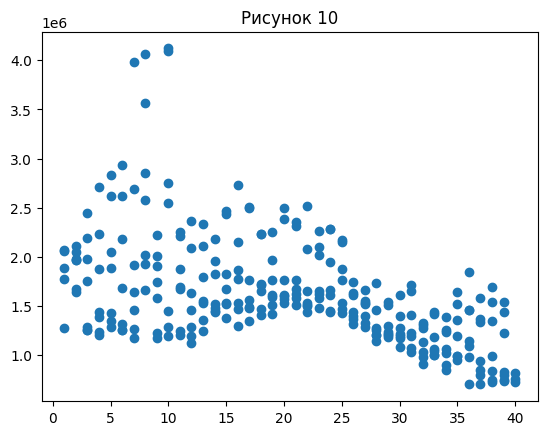

In [229]:
from matplotlib import pyplot as plt
plt.scatter(cpc_medium.week_number, cpc_medium.revenue)
plt.title('Рисунок 10')

Так как нам необходимо учитывать нелинейную связь между переменными, будем строить модель полиномиальной регрессии со степенью 3

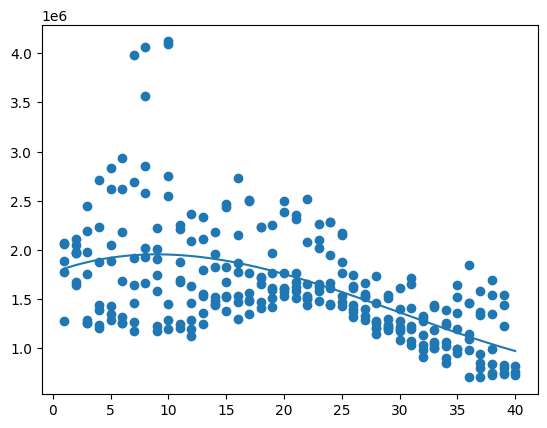

In [230]:
model = np.poly1d(np.polyfit(cpc_medium.week_number, cpc_medium.revenue, 3))

polyline = np.linspace(1, 40)
plt.scatter(cpc_medium.week_number, cpc_medium.revenue)
plt.plot(polyline, model(polyline))

Находим коэффициенты модели

In [231]:
model

poly1d([ 3.15500494e+01, -2.85371529e+03,  4.37333379e+04,  1.76940801e+06])

Подставляем полученные коэффициенты в многочлен 3 степени и получаем прогноз дохода от контекстной рекламы через полгода (24 недели) = 1 150 180.

In [236]:
prognosis_revenue = model[3] * 64 ** 3 + model[2] * 64 ** 2 + model[1] * 64 + model[0]
prognosis_revenue

1150179.9426038908